In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [47]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/data-science-assignments/10 - Dimensionality Reduction/wisconsinBreastCancer.csv',index_col = 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
# Drop unnecessary column
df.drop(columns = 'Unnamed: 32', inplace = True)
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']

In [49]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data
scaled_df = scaler.fit_transform(X)

In [50]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

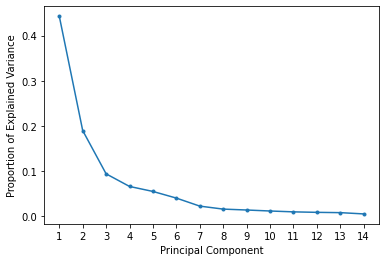

In [51]:
# Plot the explained variance ratios of the first 10 principal components
plt.plot(range(1,15), pca.explained_variance_ratio_[:14], marker = '.')
plt.xticks(ticks = range(1,15))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [52]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [53]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [54]:
# fit PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.fit_transform(X_test_sc)
# fit logistic regresssion
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

LogisticRegression()

In [55]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.960093896713615
Testing accuracy: 0.9230769230769231
